<a href="https://colab.research.google.com/github/akum001/data_science_portfolio/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seeashu007","key":"ac135018b1ee723b79feb7264acd5ada"}'}

In [2]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Dec 10 18:58 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d quanbk/cifar10 -p /content/kaggle/cifar10

 95% 154M/162M [00:02<00:00, 55.0MB/s]
100% 162M/162M [00:03<00:00, 56.0MB/s]


In [0]:
# !kaggle competitions list

In [7]:
!ls

kaggle	kaggle.json  sample_data


In [8]:
!ls kaggle/cifar10

cifar10.zip


In [9]:
!ls

kaggle	kaggle.json  sample_data


In [0]:
import zipfile
import os

In [11]:
os.listdir()

['.config', 'kaggle.json', 'kaggle', 'sample_data']

In [0]:
local_zip = 'kaggle/cifar10/cifar10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('kaggle/temp')
zip_ref.close()

In [13]:
!ls kaggle/temp

data_batch_1  data_batch_3  data_batch_5
data_batch_2  data_batch_4  test_batch


In [0]:
import pickle

In [0]:
def unpickle(file):
  with open(file, 'rb') as fo:
    cifar_dict = pickle.load(fo, encoding= 'bytes')
  return cifar_dict 

In [0]:
batch1 = unpickle("kaggle/temp/data_batch_1")
batch2 = unpickle("kaggle/temp/data_batch_2")
batch3 = unpickle("kaggle/temp/data_batch_3")
batch4 = unpickle("kaggle/temp/data_batch_4")
batch5 = unpickle("kaggle/temp/data_batch_5")
test_batch = unpickle("kaggle/temp/test_batch")

In [17]:
batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [18]:
batch1[b'data'].shape

(10000, 3072)

Loaded in this way, each of the batch files contains a dictionary with the following elements:

data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.
The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [0]:
x = batch1[b'data'].reshape(10000, 3,32,32)

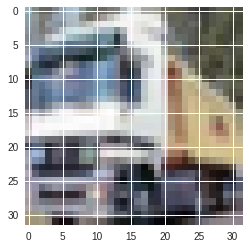

In [21]:
plt.imshow(x[1].transpose(1,2,0))

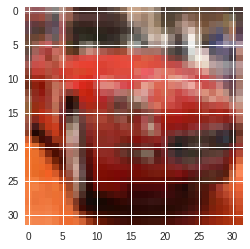

In [22]:
plt.imshow(x[5].transpose(1,2,0))

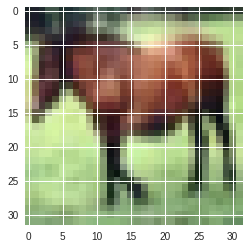

In [23]:
plt.imshow(x[7].transpose(1,2,0))

In [0]:
X = x.transpose(0,2,3,1).astype("uint8")

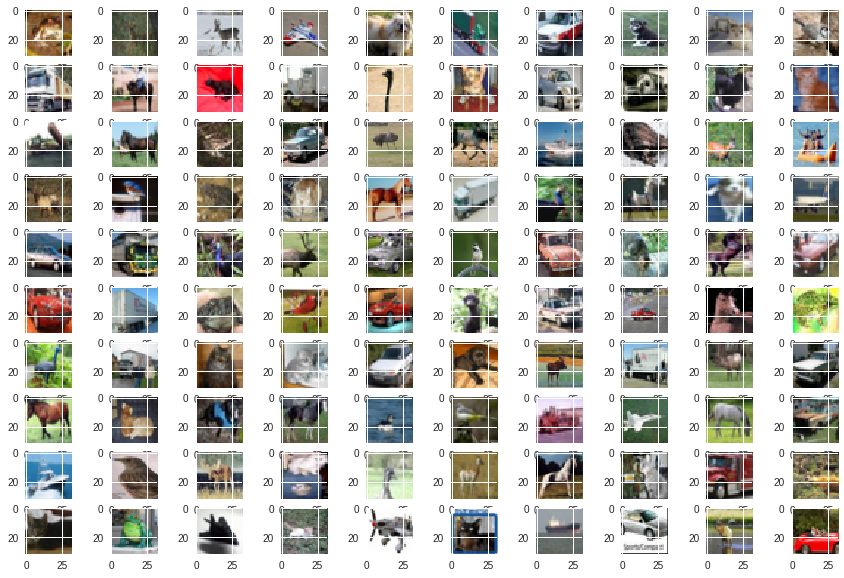

In [25]:
nrows=10
ncols=10
fig, subs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

for ii in range(nrows):
    for jj in range(ncols):
        iplt = subs[ii, jj]
        img_array = X[ii + jj*ncols]
        iplt.imshow(img_array)

# Helper Functions for Dealing With Data.

In [0]:
def one_hot_encode(vec, val = 10):
  
  n = len(vec)
  out = np.zeros((n, val))
  out[range(n), vec] = 1
  return out
  

In [0]:
class CifarHelper():
  def __init__(self):
    
    self.i = 0
    
    self.all_train_batches = [batch1, batch2, batch3, batch4, batch5]
    self.test_batch = [test_batch]
    
    self.training_images = None
    self.training_labels = None
    
    self.test_images = None
    self.test_labels = None

  def set_up_images(self):
    
    print("Setting up training images and labels")
    
    self.training_images = np.vstack([d[b'data'] for d in self.all_train_batches])
    train_len = len(self.training_images)
    self.training_images = self.training_images.reshape(train_len, 3, 32, 32).transpose(0, 2, 3, 1)/ 255
    self.training_labels = one_hot_encode(np.hstack([d[b'labels'] for d in self.all_train_batches]), 10)
    
    print("Setting up test images and labels")
    
    self.test_images = np.vstack([d[b'data'] for d in self.test_batch])
    
    test_len = len(self.test_images)
    self.test_images = self.test_images.reshape(test_len, 3, 32, 32).transpose(0, 2, 3, 1)/ 255
    self.test_labels = one_hot_encode(np.hstack([d[b'labels'] for d in self.test_batch]), 10)
  
  def next_batch(self, batch_size):
    x = self.training_images[self.i: self.i+batch_size].reshape(100, 32, 32, 3)
    y = self.training_labels[self.i : self.i+ batch_size]
    self.i = (self.i + batch_size) % len(self.training_images)
    return x, y
    

In [0]:
# np.vstack([batch1[b"data"]])

In [0]:
 #np.vstack(([[1,2],[2,3], [1,1]]))

In [0]:
# print(one_hot_encode(np.hstack(batch1[b'labels'])))

In [0]:
# np.hstack(batch1[b'labels'])

In [32]:
ch = CifarHelper()
ch.set_up_images()

Setting up training images and labels
Setting up test images and labels


In [0]:
batch = ch.next_batch(100)

In [0]:
import tensorflow as tf

In [0]:
# Create 2 place holders

x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [0]:
hold_prob = tf.placeholder(tf.float32)

In [0]:
# HELPER FUNCTION

def init_weight(shape):
  init_random_dist = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(init_random_dist)

In [0]:
def init_bias(shape):
  init_bias_vals = tf.constant(0.1, shape= shape)
  return tf.Variable(init_bias_vals)

In [0]:
def conv_2d(x, W):
  return tf.nn.conv2d(x, W, strides= [1, 1, 1, 1], padding = 'SAME')

def max_pool_2by2(x):
  return tf.nn.max_pool(x, ksize= [1, 2, 2, 1], strides = [1, 2, 2, 1], padding='VALID')
  

In [0]:
def convolutional_layer(input_x, shape):
  W = init_weight(shape)
  b = init_bias([shape[3]])
  return tf.nn.relu(conv_2d(input_x, W) + b)

In [0]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weight([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [0]:
convo_1 = convolutional_layer(x,shape=[4,4,3,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [0]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[4,4,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [0]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,8*8*64])

In [0]:
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [0]:
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [0]:
y_pred = normal_full_layer(full_one_dropout,10)

In [53]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [56]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(5000):
        batch = ch.next_batch(100)
        sess.run(train, feed_dict={x: batch[0], y_true: batch[1], hold_prob: 0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:ch.test_images,y_true:ch.test_labels,hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.1212


Currently on step 100
Accuracy is:
0.3842


Currently on step 200
Accuracy is:
0.4682


Currently on step 300
Accuracy is:
0.5034


Currently on step 400
Accuracy is:
0.5139


Currently on step 500
Accuracy is:
0.5469


Currently on step 600
Accuracy is:
0.5524


Currently on step 700
Accuracy is:
0.5742


Currently on step 800
Accuracy is:
0.5916


Currently on step 900
Accuracy is:
0.5929


Currently on step 1000
Accuracy is:
0.6346


Currently on step 1100
Accuracy is:
0.6142


Currently on step 1200
Accuracy is:
0.6463


Currently on step 1300
Accuracy is:
0.6339


Currently on step 1400
Accuracy is:
0.6405


Currently on step 1500
Accuracy is:
0.6647


Currently on step 1600
Accuracy is:
0.6576


Currently on step 1700
Accuracy is:
0.6701


Currently on step 1800
Accuracy is:
0.6491


Currently on step 1900
Accuracy is:
0.6615


Currently on step 2000
Accuracy is:
0.6761


Currently on step 2100
Accuracy is:
0.6783


Currently on step 2200